In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [ ]:
# Load dataset
df = pd.read_csv('Loan_Default.csv')

# Melihat dimensi df
print(df.shape)

# Melihat tampilan df
df.head()

df

(148670, 34)


,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,...,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,...,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,...,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,...,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,...,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,173555,2019,cf,Sex Not Available,nopre,type1,p3,l1,nopc,nob/c,...,CIB,659,EXP,55-64,to_inst,71.792763,south,direct,0,48.0
148666,173556,2019,cf,Male,nopre,type1,p1,l1,nopc,nob/c,...,CIB,569,CIB,25-34,not_inst,74.428934,south,direct,0,15.0
148667,173557,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,...,CIB,702,EXP,45-54,not_inst,61.332418,North,direct,0,49.0
148668,173558,2019,cf,Female,nopre,type1,p4,l1,nopc,nob/c,...,EXP,737,EXP,55-64,to_inst,70.683453,North,direct,0,29.0


In [ ]:
df.shape

(148670, 34)

In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head(5)

,ID,year,loan_limit,Gender,approv_in_adv,loan_type,loan_purpose,Credit_Worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,Interest_rate_spread,Upfront_charges,term,Neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,Secured_by,total_units,income,credit_type,Credit_Score,co-applicant_credit_type,age,submission_of_application,LTV,Region,Security_Type,Status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.columns

Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

In [ ]:
df.columns= df.columns.str.lower()
df.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

Things to consider before taking a loan (in general)¶
7 Factors Lenders Look at When Considering Your Loan Application
- Your credit score. ...
- Your income and employment history. ...
- Your debt-to-income ratio. ...
- Value of your collateral. ...
- Size of down payment. ...
- Liquid assets. ...
- Loan term.


In [ ]:
# columns= ['id', 'year', 'loan_limit', 'gender', 'approv_in_adv','loan_purpose', 'credit_worthiness', 'open_credit','business_or_commercial','interest_rate_spread', 'upfront_charges', 'neg_ammortization','interest_only', 'lump_sum_payment','construction_type', 'occupancy_type', 'secured_by', 'total_units','credit_type', 'co-applicant_credit_type','submission_of_application', 'ltv', 'region', 'security_type']
# df.drop(columns,axis=1, inplace =True)

Drop al

In [ ]:
df.columns
df.shape

(148670, 34)

We can start using the following data after filtiration

In [ ]:
pd.set_option("display.max_columns", df.shape[-1])
df.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,NaN,North,direct,1,NaN
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.376900,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
df.shape

(148670, 34)

Check for duplicates

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.shape

(148670, 34)

check for Nan Values


In [ ]:
df.isna().sum()

id                               0
year                             0
loan_limit                    3344
gender                           0
approv_in_adv                  908
loan_type                        0
loan_purpose                   134
credit_worthiness                0
open_credit                      0
business_or_commercial           0
loan_amount                      0
rate_of_interest             36439
interest_rate_spread         36639
upfront_charges              39642
term                            41
neg_ammortization              121
interest_only                    0
lump_sum_payment                 0
property_value               15098
construction_type                0
occupancy_type                   0
secured_by                       0
total_units                      0
income                        9150
credit_type                      0
credit_score                     0
co-applicant_credit_type         0
age                            200
submission_of_applic

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id                         148670 non-null  int64  
 1   year                       148670 non-null  int64  
 2   loan_limit                 145326 non-null  object 
 3   gender                     148670 non-null  object 
 4   approv_in_adv              147762 non-null  object 
 5   loan_type                  148670 non-null  object 
 6   loan_purpose               148536 non-null  object 
 7   credit_worthiness          148670 non-null  object 
 8   open_credit                148670 non-null  object 
 9   business_or_commercial     148670 non-null  object 
 10  loan_amount                148670 non-null  int64  
 11  rate_of_interest           112231 non-null  float64
 12  interest_rate_spread       112031 non-null  float64
 13  upfront_charges            10

There are null values , which must be filled

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
newdf = pd.DataFrame(imputer.fit_transform(df))
newdf.columns=df.columns
newdf.index=df.index

In [ ]:
newdf.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,-0.028,0.0,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,-0.028,0.0,360.0,not_neg,not_int,lpsm,308000.0,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,81.25,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.681,0.0,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.3769,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.0,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
newdf.isna().sum()

id                           0
year                         0
loan_limit                   0
gender                       0
approv_in_adv                0
loan_type                    0
loan_purpose                 0
credit_worthiness            0
open_credit                  0
business_or_commercial       0
loan_amount                  0
rate_of_interest             0
interest_rate_spread         0
upfront_charges              0
term                         0
neg_ammortization            0
interest_only                0
lump_sum_payment             0
property_value               0
construction_type            0
occupancy_type               0
secured_by                   0
total_units                  0
income                       0
credit_type                  0
credit_score                 0
co-applicant_credit_type     0
age                          0
submission_of_application    0
ltv                          0
region                       0
security_type                0
status  

Some characteristics of data and visualization

In [ ]:
newdf.columns

Index(['id', 'year', 'loan_limit', 'gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'credit_worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'interest_rate_spread', 'upfront_charges', 'term', 'neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'secured_by', 'total_units',
       'income', 'credit_type', 'credit_score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'ltv', 'region', 'security_type',
       'status', 'dtir1'],
      dtype='object')

In [ ]:
newdf['loan_type'].max()

'type3'

In [ ]:
newdf['loan_type'].min()


'type1'

In [ ]:
newdf['loan_amount'].max()

3576500

In [ ]:
newdf['loan_amount'].min()

16500

In [ ]:
newdf.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,Sex Not Available,nopre,type1,p1,l1,nopc,nob/c,116500,3.99,-0.028,0.0,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,CIB,25-34,to_inst,98.728814,south,direct,1,45.0
1,24891,2019,cf,Male,nopre,type2,p1,l1,nopc,b/c,206500,3.99,-0.028,0.0,360.0,not_neg,not_int,lpsm,308000.0,sb,pr,home,1U,4980.0,EQUI,552,EXP,55-64,to_inst,81.25,North,direct,1,37.0
2,24892,2019,cf,Male,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,CIB,35-44,to_inst,80.019685,south,direct,0,46.0
3,24893,2019,cf,Male,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.681,0.0,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,CIB,45-54,not_inst,69.3769,North,direct,0,42.0
4,24894,2019,cf,Joint,pre,type1,p1,l1,nopc,nob/c,696500,4.0,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,EXP,25-34,not_inst,91.886544,North,direct,0,39.0


In [ ]:
newdf['age'].value_counts()

45-54    34920
35-44    32818
55-64    32534
65-74    20744
25-34    19142
>74       7175
<25       1337
Name: age, dtype: int64

In [ ]:
newdf['rate_of_interest'].min()

0.0

In [ ]:
newdf['rate_of_interest'].max()

8.0

In [ ]:
newdf['rate_of_interest'].mean()

4.031878691058107

In [ ]:
newdf['status'].value_counts()

0    112031
1     36639
Name: status, dtype: int64

In [ ]:
newdf['property_value'].value_counts()

308000.0     17890
258000.0      2763
358000.0      2679
408000.0      2537
328000.0      2524
             ...  
4648000.0        1
3878000.0        1
5758000.0        1
2618000.0        1
2698000.0        1
Name: property_value, Length: 385, dtype: int64

In [ ]:
mask=newdf['property_value']==newdf['property_value']
newdf[mask]['loan_amount']

0         116500
1         206500
2         406500
3         456500
4         696500
           ...  
148665    436500
148666    586500
148667    446500
148668    196500
148669    406500
Name: loan_amount, Length: 148670, dtype: object

In [ ]:
newdf.describe()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
count,148670,148670,148670,148670,148670,148670,148670,148670,148670,148670,148670,148670.00,148670.000,148670.0,148670.0,148670,148670,148670,148670.0,148670,148670,148670,148670,148670.0,148670,148670,148670,148670,148670,148670.00,148670,148670,148670,148670.0
unique,148670,1,2,4,2,3,4,2,2,2,211,131.00,22516.000,58271.0,26.0,2,2,2,385.0,2,3,2,4,1001.0,4,401,2,7,2,8484.00,4,2,2,57.0
top,24890,2019,cf,Male,nopre,type1,p3,l1,nopc,nob/c,206500,3.99,-0.028,0.0,360.0,not_neg,not_int,not_lpsm,308000.0,sb,pr,home,1U,0.0,CIB,763,CIB,45-54,to_inst,81.25,North,direct,0,37.0
freq,1,148670,138692,42346,125529,113173,56068,142344,148114,127908,4610,50894.00,36716.000,60412.0,121726.0,133541,141560,145286,17890.0,148637,138201,148637,146480,10410.0,48152,415,74392,34920,96014,15628.00,74722,148637,112031,30969.0


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   id                         148670 non-null  object
 1   year                       148670 non-null  object
 2   loan_limit                 148670 non-null  object
 3   gender                     148670 non-null  object
 4   approv_in_adv              148670 non-null  object
 5   loan_type                  148670 non-null  object
 6   loan_purpose               148670 non-null  object
 7   credit_worthiness          148670 non-null  object
 8   open_credit                148670 non-null  object
 9   business_or_commercial     148670 non-null  object
 10  loan_amount                148670 non-null  object
 11  rate_of_interest           148670 non-null  object
 12  interest_rate_spread       148670 non-null  object
 13  upfront_charges            148670 non-null  

In [ ]:
for col in newdf:
    print(col)
    print(newdf[col].unique())
    print('\n')

id
[24890 24891 24892 ... 173557 173558 173559]


year
[2019]


loan_limit
['cf' 'ncf']


gender
['Sex Not Available' 'Male' 'Joint' 'Female']


approv_in_adv
['nopre' 'pre']


loan_type
['type1' 'type2' 'type3']


loan_purpose
['p1' 'p4' 'p3' 'p2']


credit_worthiness
['l1' 'l2']


open_credit
['nopc' 'opc']


business_or_commercial
['nob/c' 'b/c']


loan_amount
[116500 206500 406500 456500 696500 706500 346500 266500 376500 436500
 136500 466500 226500 76500 356500 156500 586500 306500 316500 336500
 426500 476500 196500 186500 246500 216500 506500 656500 256500 396500
 166500 236500 866500 416500 386500 596500 606500 86500 286500 146500
 446500 636500 486500 326500 56500 906500 496500 106500 126500 296500
 176500 1376500 566500 686500 556500 676500 366500 276500 716500 66500
 616500 96500 826500 26500 666500 546500 986500 526500 1226500 726500
 1486500 1416500 536500 796500 516500 46500 876500 576500 626500 1506500
 886500 816500 646500 776500 746500 736500 896500 836500 806500 1386

In [ ]:
cleanup_nums = {"gender": {"Male": 1, "Female": 2, "Sex Not Available":3, "Joint":4},
                "age": {"<25":1, "25-34":2, "35-44":3, "45-54":4, "55-64":5, "65-74":6, ">74":7},
                "region": {"south": 1, "North": 2, "central": 3, "North-East": 4},
                "security_type": {"direct": 1, "Indriect": 2},
                "co-applicant_credit_type": {"CIB": 1, "EXP": 2},
                "submission_of_application": {"to_inst":1, "not_inst": 2 }}
df = df.replace(cleanup_nums)
df.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,24890,2019,cf,3,nopre,type1,p1,l1,nopc,nob/c,116500,NaN,NaN,NaN,360.0,not_neg,not_int,not_lpsm,118000.0,sb,pr,home,1U,1740.0,EXP,758,1,2.0,1.0,98.728814,1,1,1,45.0
1,24891,2019,cf,1,nopre,type2,p1,l1,nopc,b/c,206500,NaN,NaN,NaN,360.0,not_neg,not_int,lpsm,NaN,sb,pr,home,1U,4980.0,EQUI,552,2,5.0,1.0,NaN,2,1,1,NaN
2,24892,2019,cf,1,pre,type1,p1,l1,nopc,nob/c,406500,4.56,0.2000,595.0,360.0,neg_amm,not_int,not_lpsm,508000.0,sb,pr,home,1U,9480.0,EXP,834,1,3.0,1.0,80.019685,1,1,0,46.0
3,24893,2019,cf,1,nopre,type1,p4,l1,nopc,nob/c,456500,4.25,0.6810,NaN,360.0,not_neg,not_int,not_lpsm,658000.0,sb,pr,home,1U,11880.0,EXP,587,1,4.0,2.0,69.376900,2,1,0,42.0
4,24894,2019,cf,4,pre,type1,p1,l1,nopc,nob/c,696500,4.00,0.3042,0.0,360.0,not_neg,not_int,not_lpsm,758000.0,sb,pr,home,1U,10440.0,CRIF,602,2,2.0,2.0,91.886544,2,1,0,39.0


In [ ]:

newdf = newdf.apply(lambda x: pd.factorize(x)[0])
newdf.head()

<ipython-input-37-6eb129c2d235>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  newdf = newdf.apply(lambda x: pd.factorize(x)[0])
<ipython-input-37-6eb129c2d235>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  newdf = newdf.apply(lambda x: pd.factorize(x)[0])
<ipython-input-37-6eb129c2d235>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  newdf = newdf.apply(lambda x: pd.factorize(x)[0])
<ipython-input-37-6eb129c2d235>:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  newdf = newdf.apply(lambda x: pd.factorize(x)[0])
<ipython-input-37-6eb129c2d235>:1: FutureWarning: In

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,0,1
2,2,0,0,1,1,0,0,0,0,0,2,1,1,1,0,1,0,0,2,0,0,0,0,2,0,2,0,2,0,2,0,0,1,2
3,3,0,0,1,0,0,1,0,0,0,3,2,2,0,0,0,0,0,3,0,0,0,0,3,0,3,0,3,1,3,1,0,1,3
4,4,0,0,2,1,0,0,0,0,0,4,3,3,0,0,0,0,0,4,0,0,0,0,4,2,4,1,0,1,4,1,0,1,4


In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148670 entries, 0 to 148669
Data columns (total 34 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   id                         148670 non-null  int64
 1   year                       148670 non-null  int64
 2   loan_limit                 148670 non-null  int64
 3   gender                     148670 non-null  int64
 4   approv_in_adv              148670 non-null  int64
 5   loan_type                  148670 non-null  int64
 6   loan_purpose               148670 non-null  int64
 7   credit_worthiness          148670 non-null  int64
 8   open_credit                148670 non-null  int64
 9   business_or_commercial     148670 non-null  int64
 10  loan_amount                148670 non-null  int64
 11  rate_of_interest           148670 non-null  int64
 12  interest_rate_spread       148670 non-null  int64
 13  upfront_charges            148670 non-null  int64
 14  term

In [ ]:
newdf.describe()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
count,148670.000000,148670.0,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.00000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.000000,148670.00000,148670.000000,148670.000000,148670.000000,148670.000000
mean,74334.500000,0.0,0.067115,1.391955,0.155653,0.337876,1.188922,0.042551,0.00374,0.139652,31.499839,8.686958,6517.399267,13107.734735,0.693280,0.101762,0.047824,0.022762,45.161620,0.000222,0.119789,0.000222,0.021679,116.566611,1.665138,199.785538,0.499617,2.218356,0.354180,1198.02215,0.644521,0.000222,0.753555,15.528271
std,42917.476598,0.0,0.250222,1.054393,0.362528,0.649571,0.813501,0.201842,0.06104,0.346626,22.137044,9.709717,6267.923658,17603.685246,1.993575,0.302336,0.213394,0.149144,40.684114,0.014897,0.451866,0.014897,0.198521,105.273364,1.194302,116.031993,0.500002,1.434375,0.478266,1473.59144,0.629250,0.014897,0.430942,15.194295
min,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
25%,37167.250000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,14.000000,0.000000,47.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,38.000000,0.000000,99.000000,0.000000,1.000000,0.000000,232.00000,0.000000,0.000000,1.000000,2.000000
50%,74334.500000,0.0,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,28.000000,6.000000,5095.000000,2051.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000,0.000000,0.000000,95.000000,2.000000,200.000000,0.000000,2.000000,0.000000,691.00000,1.000000,0.000000,1.000000,11.000000
75%,111501.750000,0.0,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.00000,0.000000,47.000000,15.000000,11176.000000,24190.000000,0.000000,0.000000,0.000000,0.000000,69.000000,0.000000,0.000000,0.000000,0.000000,169.000000,3.000000,300.000000,1.000000,3.000000,1.000000,1546.00000,1.000000,0.000000,1.000000,27.000000
max,148669.000000,0.0,1.000000,3.000000,1.000000,2.000000,3.000000,1.000000,1.00000,1.000000,210.000000,130.000000,22515.000000,58270.000000,25.000000,1.000000,1.000000,1.000000,384.000000,1.000000,2.000000,1.000000,3.000000,1000.000000,3.000000,400.000000,1.000000,6.000000,1.000000,8483.00000,3.000000,1.000000,1.000000,56.000000


<Axes: xlabel='loan_type', ylabel='count'>

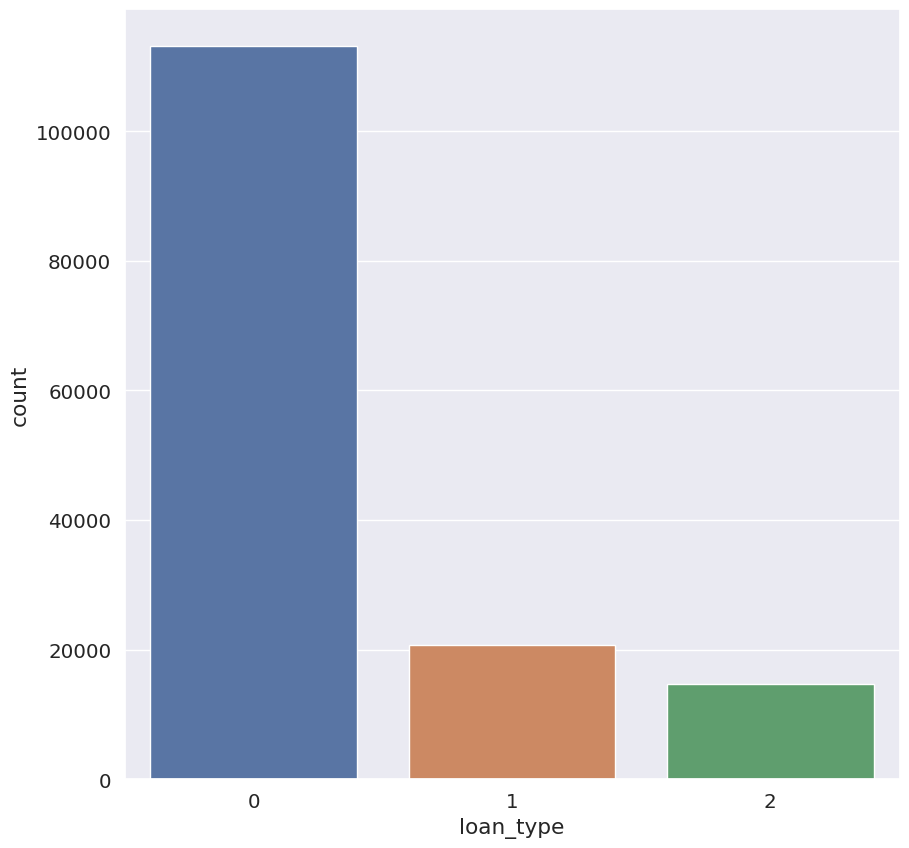

In [ ]:
sns.countplot(data=newdf, x ='loan_type')

<Axes: xlabel='age', ylabel='count'>

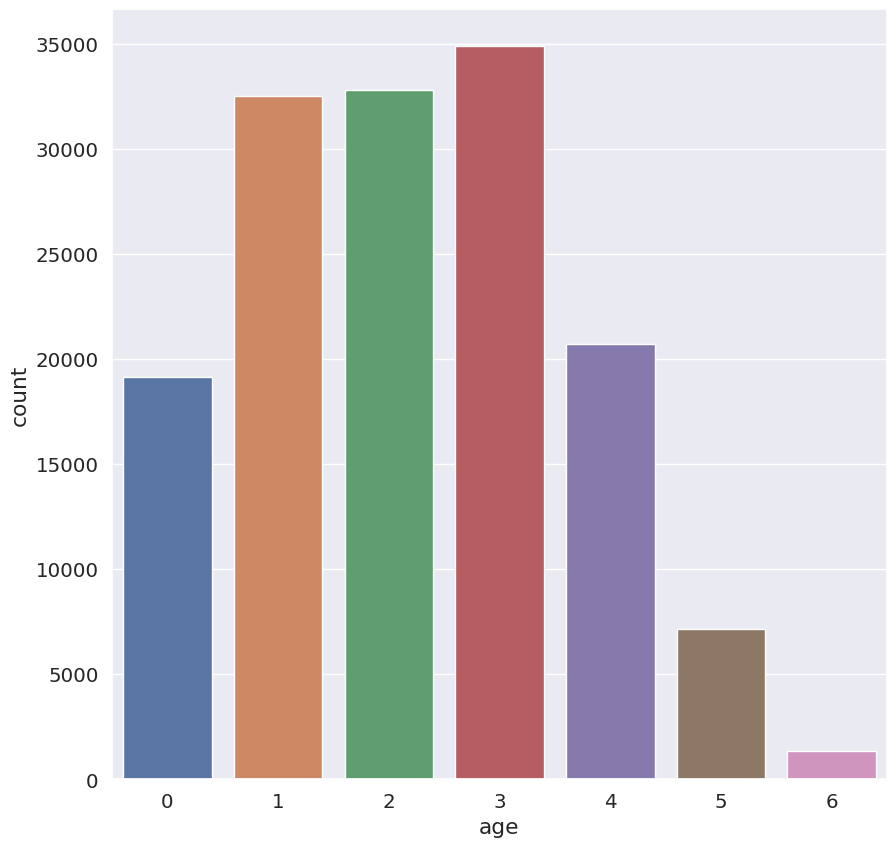

In [ ]:
sns.countplot(data=newdf, x='age')

<Axes: xlabel='rate_of_interest', ylabel='income'>

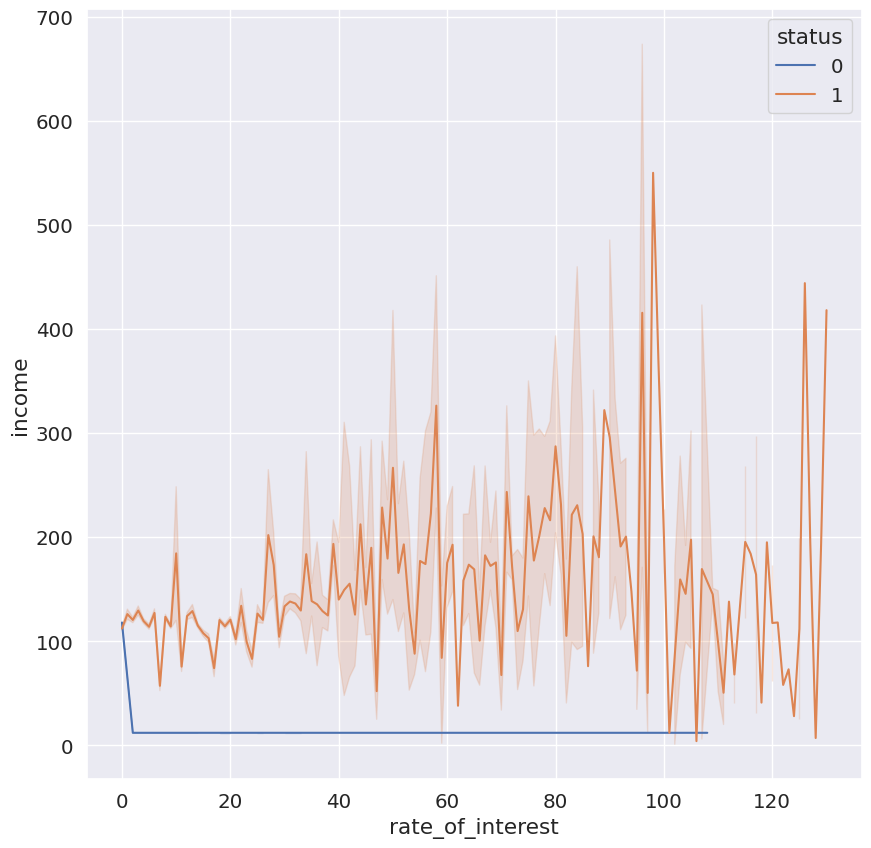

In [ ]:
sns.lineplot(data=newdf, x="rate_of_interest", y="income", hue = "status")

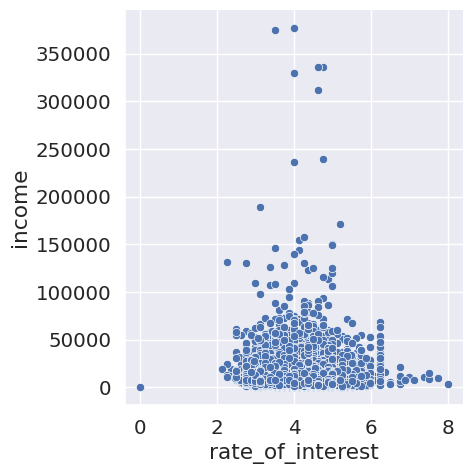

In [ ]:
sns.relplot(x = "rate_of_interest", y= "income", data= df)

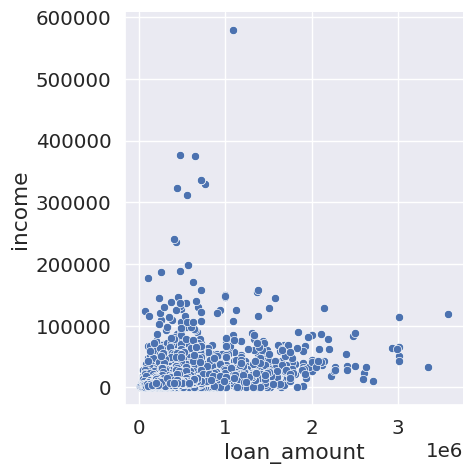

In [ ]:
sns.relplot(x = "loan_amount", y= "income", data = df)

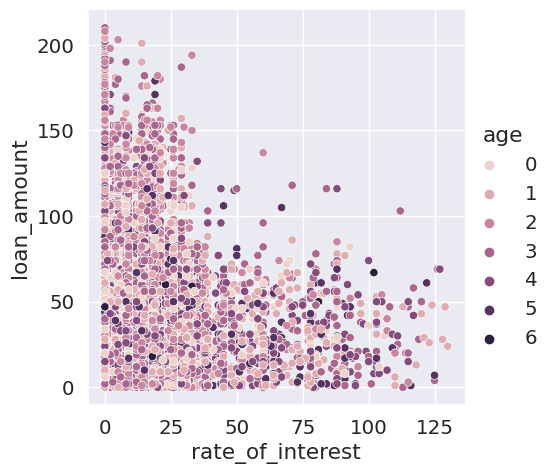

In [ ]:
sns.relplot(x = "rate_of_interest", y = "loan_amount", hue = 'age', data = newdf)

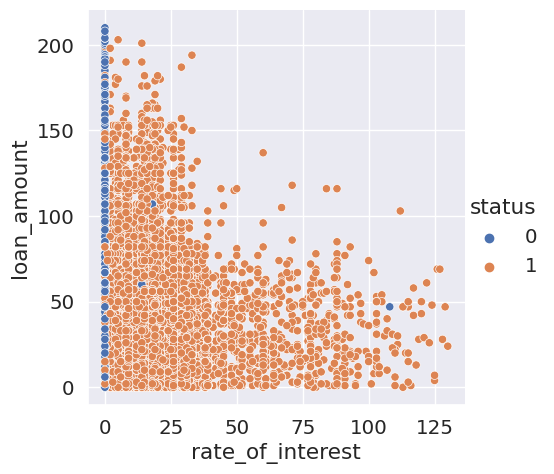

In [ ]:
sns.relplot(x = "rate_of_interest", y = "loan_amount", hue = 'status', data = newdf)

<ipython-input-47-d84d1c88b511>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(newdf['loan_amount'])


<Axes: xlabel='loan_amount', ylabel='Density'>

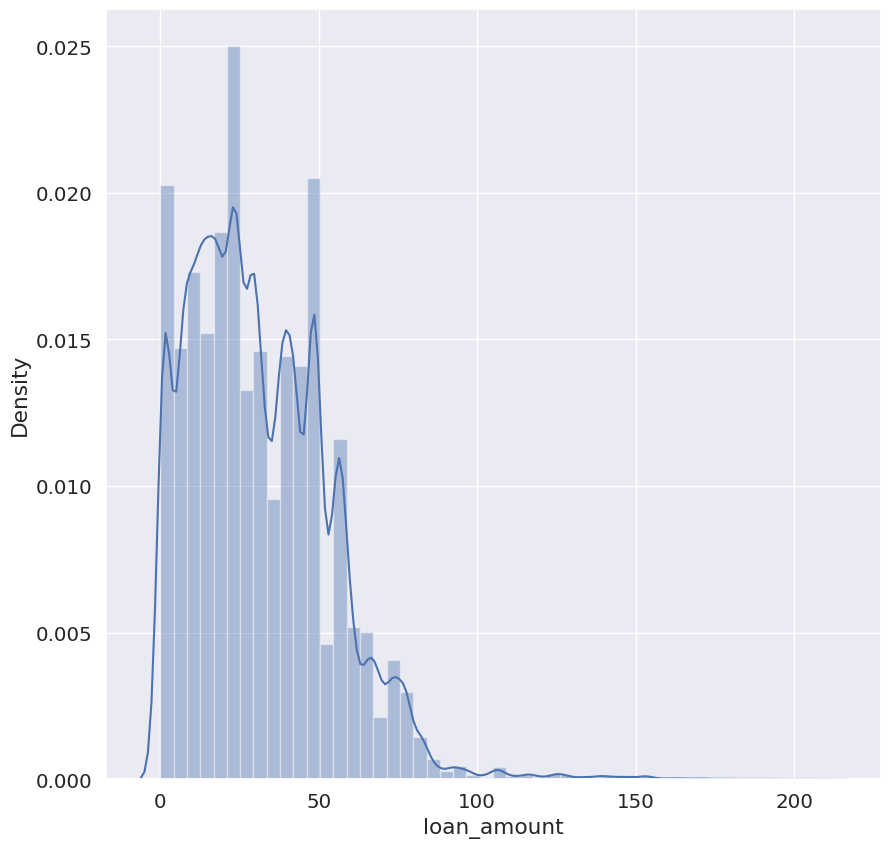

In [ ]:
sns.distplot(newdf['loan_amount'])

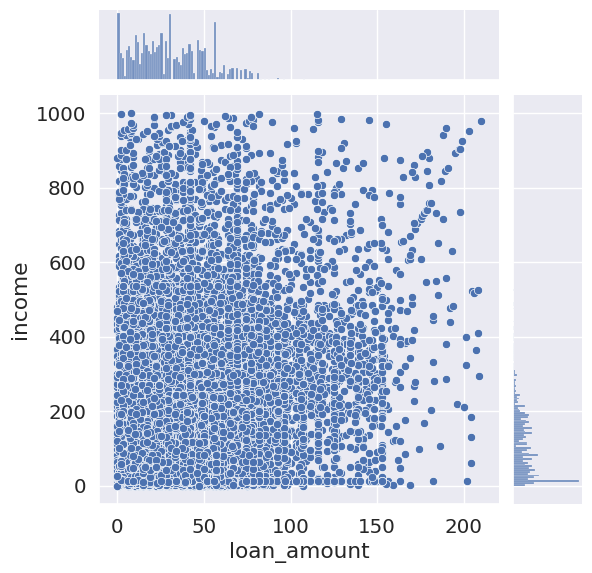

In [ ]:
sns.jointplot(data=newdf, x='loan_amount', y='income')

Dealing with non numerical values

In [ ]:
newdf.head()

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,status,dtir1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,0,1
2,2,0,0,1,1,0,0,0,0,0,2,1,1,1,0,1,0,0,2,0,0,0,0,2,0,2,0,2,0,2,0,0,1,2
3,3,0,0,1,0,0,1,0,0,0,3,2,2,0,0,0,0,0,3,0,0,0,0,3,0,3,0,3,1,3,1,0,1,3
4,4,0,0,2,1,0,0,0,0,0,4,3,3,0,0,0,0,0,4,0,0,0,0,4,2,4,1,0,1,4,1,0,1,4


In [ ]:
newdf = pd.get_dummies(newdf, columns=['loan_type','age'], drop_first=True)

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148670 entries, 0 to 148669
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype
---  ------                     --------------   -----
 0   id                         148670 non-null  int64
 1   year                       148670 non-null  int64
 2   loan_limit                 148670 non-null  int64
 3   gender                     148670 non-null  int64
 4   approv_in_adv              148670 non-null  int64
 5   loan_purpose               148670 non-null  int64
 6   credit_worthiness          148670 non-null  int64
 7   open_credit                148670 non-null  int64
 8   business_or_commercial     148670 non-null  int64
 9   loan_amount                148670 non-null  int64
 10  rate_of_interest           148670 non-null  int64
 11  interest_rate_spread       148670 non-null  int64
 12  upfront_charges            148670 non-null  int64
 13  term                       148670 non-null  int64
 14  neg_

In [ ]:
pd.set_option("display.max_columns", newdf.shape[-1])
newdf.head()

,id,year,loan_limit,gender,approv_in_adv,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,submission_of_application,ltv,region,security_type,status,dtir1,loan_type_1,loan_type_2,age_1,age_2,age_3,age_4,age_5,age_6
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0
2,2,0,0,1,1,0,0,0,0,2,1,1,1,0,1,0,0,2,0,0,0,0,2,0,2,0,0,2,0,0,1,2,0,0,0,1,0,0,0,0
3,3,0,0,1,0,1,0,0,0,3,2,2,0,0,0,0,0,3,0,0,0,0,3,0,3,0,1,3,1,0,1,3,0,0,0,0,1,0,0,0
4,4,0,0,2,1,0,0,0,0,4,3,3,0,0,0,0,0,4,0,0,0,0,4,2,4,1,1,4,1,0,1,4,0,0,0,0,0,0,0,0


In [ ]:
newdf.shape

(148670, 40)

Data Split to Train and Test Sets

In [ ]:
x = newdf.drop('status', axis=1)
y = newdf['status']

In [ ]:
x

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,dtir1
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,1,1,0,1,1,0,1
2,2,0,0,1,1,0,0,0,0,0,2,1,1,1,0,1,0,0,2,0,0,0,0,2,0,2,0,2,0,2,0,0,2
3,3,0,0,1,0,0,1,0,0,0,3,2,2,0,0,0,0,0,3,0,0,0,0,3,0,3,0,3,1,3,1,0,3
4,4,0,0,2,1,0,0,0,0,0,4,3,3,0,0,0,0,0,4,0,0,0,0,4,2,4,1,0,1,4,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148665,148665,0,0,0,0,0,2,0,0,0,9,21,8985,8207,2,0,0,0,35,0,0,0,0,13,3,334,1,1,0,761,0,0,38
148666,148666,0,0,1,0,0,0,0,0,0,16,22,1712,0,0,0,0,0,87,0,2,0,3,49,3,165,0,0,1,2062,0,0,34
148667,148667,0,0,1,0,0,1,0,0,0,40,21,234,58269,2,0,0,0,100,0,0,0,0,198,3,157,1,3,1,3099,1,0,15
148668,148668,0,0,3,0,0,1,0,0,0,22,19,12368,58270,2,0,0,0,65,0,0,0,0,49,0,134,1,1,0,402,1,0,45


In [ ]:
y

0         0
1         0
2         1
3         1
4         1
         ..
148665    1
148666    1
148667    1
148668    1
148669    1
Name: status, Length: 148670, dtype: int64

In [ ]:
x.shape

(148670, 33)

In [ ]:
y.shape

(148670,)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.3)

In [ ]:
x_train

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,dtir1
97255,97255,0,0,2,0,0,2,0,0,0,22,5,11780,18490,2,0,0,0,40,0,0,0,0,10,3,208,1,4,0,670,1,0,4
104784,104784,0,0,3,0,0,2,0,0,0,50,0,10203,43042,0,0,0,0,103,0,0,0,0,189,3,290,0,4,0,395,1,0,15
40011,40011,0,0,2,0,0,1,0,0,0,36,9,13685,0,0,0,0,0,100,0,0,0,0,107,0,82,1,2,1,2939,1,0,4
115968,115968,0,0,0,0,1,0,0,0,1,3,0,17334,46982,0,0,0,0,23,0,0,0,0,256,3,368,1,3,0,363,0,0,27
29478,29478,0,0,1,0,0,1,0,0,0,1,32,12828,6688,0,0,0,0,52,0,0,0,0,213,3,73,0,3,1,996,1,0,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126558,126558,0,1,2,0,0,0,0,0,0,25,4,15132,50742,0,0,0,0,62,0,0,0,0,143,0,127,1,1,0,529,1,0,3
59899,59899,0,0,2,0,0,1,0,0,0,49,0,0,0,0,0,0,0,25,0,0,0,0,38,3,252,1,4,0,109,1,0,8
121471,121471,0,0,1,0,0,0,0,0,0,1,26,6918,48977,0,0,0,0,103,0,2,0,0,43,0,105,0,2,0,551,1,0,6
141131,141131,0,0,1,0,1,1,0,0,1,24,0,0,0,0,0,0,1,25,0,0,0,0,14,2,35,0,6,0,107,0,0,52


In [ ]:
x_train.shape

(104069, 33)

In [ ]:
x_test

,id,year,loan_limit,gender,approv_in_adv,loan_type,loan_purpose,credit_worthiness,open_credit,business_or_commercial,loan_amount,rate_of_interest,interest_rate_spread,upfront_charges,term,neg_ammortization,interest_only,lump_sum_payment,property_value,construction_type,occupancy_type,secured_by,total_units,income,credit_type,credit_score,co-applicant_credit_type,age,submission_of_application,ltv,region,security_type,dtir1
55635,55635,0,0,1,0,1,2,0,0,1,39,0,0,0,0,0,0,1,1,0,0,0,0,243,1,41,1,2,0,1,1,0,1
119579,119579,0,0,2,0,0,0,0,0,0,19,1,7620,48276,0,0,0,0,20,0,0,0,0,109,0,53,1,2,1,23,1,0,16
111319,111319,0,0,2,0,2,1,0,0,0,19,11,5466,758,0,0,0,0,23,0,0,0,0,12,2,201,1,5,1,1720,1,0,1
98335,98335,0,0,1,0,0,2,0,0,0,42,9,1166,40699,0,0,0,0,111,0,0,0,0,46,0,80,0,2,1,2950,0,0,38
20893,20893,0,0,0,0,0,2,0,0,0,23,8,10432,10178,0,0,0,0,53,0,0,0,0,127,2,212,1,1,0,80,0,0,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128146,128146,0,1,1,0,0,2,0,0,0,49,6,20537,51287,0,0,0,0,76,0,0,0,0,109,2,221,0,1,1,264,0,0,0
82475,82475,0,0,0,1,2,2,0,0,0,40,19,3221,3766,0,0,0,0,19,0,0,0,0,74,3,193,0,3,0,2128,0,0,0
146363,146363,0,0,1,0,0,2,0,0,0,14,0,0,0,0,0,0,0,59,0,2,0,0,188,2,102,0,2,1,1333,1,0,35
61262,61262,0,0,0,0,1,2,0,0,1,12,0,0,0,0,1,0,0,12,0,0,0,0,41,3,379,1,1,0,13,0,0,16


In [ ]:
y_train

97255     1
104784    1
40011     1
115968    1
29478     1
         ..
126558    1
59899     0
121471    1
141131    0
73050     0
Name: status, Length: 104069, dtype: int64

In [ ]:
x_train.shape

(104069, 33)

In [ ]:
y_train.shape

(104069,)

In [ ]:
y_train.value_counts()

1    78392
0    25677
Name: status, dtype: int64

In [ ]:
sm = SMOTE()
x_train, y_train = sm.fit_resample(x_train, y_train)

In [ ]:
y_train.value_counts()

1    78392
0    78392
Name: status, dtype: int64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10961     1]
 [    1 33638]]
0.9999551579560997


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9999551579560997


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

model=RandomForestClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[10962     0]
 [    3 33636]]
0.9999327369341494


In [ ]:
print(f'training accuaracy: {model.score(x_train,y_train)}')
print(f'testing accuaracy: {model.score(x_test,y_test)}')

training accuaracy: 1.0
testing accuaracy: 0.9999327369341494


In [ ]:
from sklearn.model_selection import cross_val_score
accuracy = cross_val_score(estimator=model, X=x_train, y=y_train, cv=10)
accuracy

array([1.        , 0.99993622, 0.99993622, 1.        , 0.99993622,
       1.        , 1.        , 1.        , 0.99993622, 0.99993622])

Conclusion:

This model was created for predicting the eligibility for a loan (approved or not) according to many features.
There were large number of features must be dropped , as:
Some of these features were meaningless such as (ID, Year, upfront charges, approved in advance…).
Some features had the same meaning and give the same information such as (loan purpose & loam type, Credit worthiness & credit score, Secured by & property value, LTV & dtir…)
Some features related to the post-process of approval such as (Nag amortization, submission of application…)
From all of these features (Loan type, loan amount rate of interest, term, property value, income, credit score, age and dirt) were used to predict the eligibility for loan.
We were asked to fill (Nan values) for some features and predict other values for some illogical values (income, interest rate).
Number of unapproved loans were larger than approved.
Loan amounts were between (3,576,500 and 16,500) with average interest rate (4.05).
The largest category applied for alone there ages were between (45-54) for loan of (type 3).
There is a lightly linear correlation between features and manly strong between (loan amount & property value& income).
After handling outliers and scaling, we were asked to convert all values to numerical values to be ready to be used for the model.
Splitting data into train and test considering the scaling process to avoid any biased toward specific data.
As our target was categorical, we cannot use Linear Regression model.
The Decision tree model and Random forest model gave the best accuracy.
Our first trial to drop features and depending on (18 feature) , we were suffering from overfitting ( train 98% & test 75% ) and can be handled by Cross validation and gave ( train 100% & test 100% ).
After reducing the features to (10 features) and depending on the only affected features and it was a way of reducing overfitting, the accuracy was (train 93% & test 83%).
By applying Cross validation, we got accuracy of 99% for average training score and 97% for average testing score.
Alternativelly &Finally , using very simple model without scaling gave a very high accuracy without the needing for applying cross validation, as Decision Trees & Random foreast don't need it actually. Because, they just try to find a threshold value for a given feature that best splits the samples. And, whether you scale it or not, a similar threshold will be chosen, since the ordinality of the variables doesn't change(they do not require feature scaling to be performed as they are not sensitive to the the variance in the data.)..
